## Work through the Reforge framework to identify habit moment, aha moment, and setup moment, by identifying features with highest correlation with long-term retention (active in past year)

**Inputs: **

* users with:
  * first order between 2017-01-01 and 2017-10-01 (to see if retained in past year) (would be better to do a whole year)
  * lifetime total payment >= 10 GBP
  * lifetime number of orders > 1
     
* retention_frequency_analysis.csv from https://touchnote.eu.looker.com/looks/1853
    * columns: 'user_id', 'first_use_case', 'main_use_case', 'first_order_month', 'days_since_last_order', 'orders_week_1', 'orders_month_1', 'orders_year_1', 'days_ordered_first_year', 'payments_by_week_1', 'payments_by_month_1', 'payments_by_month_12'
* monthly_orders_usercohort.csv from https://touchnote.eu.looker.com/looks/1785
     * columns: 'user_id','days_since_user_tier', 'days_ordered_in_month'
     
**Outputs: **
 * retention_corrs_by_use_case.csv
 
**Results: **
 * habit moment: feature with highest correlation with retention: 'quarters_ordered_first_year'
 * aha moment: feature with highest correlation with habit moment
 * setup moment: feature with highest correlation with aha moment

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df_1 = pd.read_csv('monthly_orders_usercohort_V2.csv')

In [35]:
df_1.columns=['user_id','days_since_user_tier', 'days_ordered_in_month']

df_1.rename({'days_since_user_tier': 'month'}, axis=1, inplace=True)

df_1["month"] = df_1["month"].astype('category')

df_1.month.cat.categories

df_1.month = df_1.month.cat.rename_categories({'Below 30':  '1',
                                               '30 to 59':  '2',
                                               '60 to 89':  '3',
                                               '90 to 119': '4',
                                               '120 to 149':'5',
                                               '150 to 179':'6',
                                               '180 to 209':'7',
                                               '210 to 239':'8',
                                               '240 to 269':'9',
                                               '270 to 299':'10',
                                               '300 to 329':'11',
                                               '330 to 365':'12'})

df_1.head()

df_1_pivot = df_1.pivot_table(index='user_id', columns='month', values=['days_ordered_in_month'], fill_value=0)

df_1_pivot.columns = ['_'.join(col) for col in df_1_pivot.columns.values]

df_1_pivot.columns

df_1_pivot.reset_index(level=0, inplace=True)

df_1_pivot.head()

In [18]:
df_2 = pd.read_csv('retention frequency V2.csv')

In [19]:
df_2.head()

Users ID User Order Facts First Order Month  \
0  40725542                            2017-10   
1  40766088                            2017-10   
2  40753990                            2017-10   
3  40733056                            2017-10   
4  40728960                            2017-10   

   Orders Days Between Last Order and Today  \
0                                        13   
1                                       382   
2                                        51   
3                                       395   
4                                       341   

   User Order Facts Orders Within Week 1  \
0                                      5   
1                                      7   
2                                      1   
3                                      1   
4                                      2   

   User Order Facts Orders Within Month 1  \
0                                      15   
1                                       7   
2                                       1   
3                                       2   
4                                       3   

   User Order Facts Orders Within Year 1  \
0                                     21   
1                                      7   
2                                      7   
3                                      2   
4                                      4   

   User Order Days Months Ordered Pc Gc In First Year  \
0                                                 3.0   
1                                                 1.0   
2                                                 4.0   
3                                                 1.0   
4                                                 3.0   

   User Payment Facts Total payments by week 1 in GBP  \
0                                              7.6099   
1                                             19.9000   
2                                              2.9900   
3                                             13.7284   
4                                             13.7284   

   User Payment Facts Total payments by month 1 in GBP  \
0                                              21.2777   
1                                              19.9000   
2                                               2.9900   
3                                              13.7284   
4                                              13.7284   

   User Payment Facts Total payments by month 12 in GBP  \
0                                               44.7556   
1                                               19.9000   
2                                               22.8900   
3                                               13.7284   
4                                               13.7284   

  Use Cases First Use Case Use Cases Main Use Case  
0             just_because            just because  
1                thank_you               thank you  
2                thank_you               thank you  
3             just_because              travelling  
4             just_because              travelling

In [20]:
df_2.columns = ['user_id', 'first_order_month', 'days_since_last_order', 
                'orders_week_1', 'orders_month_1', 'orders_year_1', 
               'months_ordered_first_year', 'payments_by_week_1', 'payments_by_month_1', 
                'payments_by_month_12', 'first_use_case', 'main_use_case']

In [21]:
df_2['retained'] = df_2['days_since_last_order'].apply(lambda x: 1 if x <365 else 0)

In [22]:
df_2.drop('days_since_last_order', axis=1, inplace=True)

In [23]:
df_2.retained.value_counts()

1    70912
0    33248
Name: retained, dtype: int64

In [24]:
df_2 = df_2.loc[pd.notnull(df_2['months_ordered_first_year'])]

In [27]:
df_2['months_ordered_first_year'] = df_2['months_ordered_first_year'].astype(int)

In [28]:
df_2['first_order_month'] = df_2['first_order_month'].apply(lambda x: x[5:])

In [29]:
df_2['first_order_month_name'] = df_2['first_order_month'].apply(lambda x: 'January' if x =='01'
                                                        else 'February' if x=='02'
                                                        else 'March' if x=='03'
                                                        else 'April' if x=='04'
                                                        else 'May' if x=='05'
                                                        else 'June' if x=='06'
                                                        else 'July' if x=='07'
                                                        else 'August' if x=='08'
                                                        else 'September' if x=='09'
                                                        else 'October' if x=='10'
                                                        else 'November' if x=='11'
                                                        else 'December')

In [30]:
df_2.drop('first_order_month', axis=1, inplace=True)

In [31]:
df_2.head()

user_id  orders_week_1  orders_month_1  orders_year_1  \
0  40725542              5              15             21   
1  40766088              7               7              7   
2  40753990              1               1              7   
3  40733056              1               2              2   
4  40728960              2               3              4   

   months_ordered_first_year  payments_by_week_1  payments_by_month_1  \
0                          3              7.6099              21.2777   
1                          1             19.9000              19.9000   
2                          4              2.9900               2.9900   
3                          1             13.7284              13.7284   
4                          3             13.7284              13.7284   

   payments_by_month_12 first_use_case main_use_case  retained  \
0               44.7556   just_because  just because         1   
1               19.9000      thank_you     thank you         0   
2               22.8900      thank_you     thank you         1   
3               13.7284   just_because    travelling         0   
4               13.7284   just_because    travelling         1   

  first_order_month_name  
0                October  
1                October  
2                October  
3                October  
4                October

In [52]:
# merge
df_all = pd.merge(df_1_pivot, df_2, on='user_id')

In [53]:
df_all.columns

Index(['user_id', 'days_ordered_in_month_5', 'days_ordered_in_month_6',
       'days_ordered_in_month_7', 'days_ordered_in_month_8',
       'days_ordered_in_month_9', 'days_ordered_in_month_10',
       'days_ordered_in_month_2', 'days_ordered_in_month_11',
       'days_ordered_in_month_12', 'days_ordered_in_month_366 to 729',
       'days_ordered_in_month_3', 'days_ordered_in_month_4',
       'days_ordered_in_month_1', 'orders_week_1', 'orders_month_1',
       'orders_year_1', 'months_ordered_first_year', 'payments_by_week_1',
       'payments_by_month_1', 'payments_by_month_12', 'first_use_case',
       'main_use_case', 'retained', 'first_order_month_name'],
      dtype='object')

In [54]:
df_all.head()

user_id  days_ordered_in_month_5  days_ordered_in_month_6  \
0   8888854                        0                        0   
1   9742166                        0                        0   
2  12160876                        0                        0   
3  12947525                        0                        0   
4  32170859                        0                        0   

   days_ordered_in_month_7  days_ordered_in_month_8  days_ordered_in_month_9  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        1                        0                        0   

   days_ordered_in_month_10  days_ordered_in_month_2  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   days_ordered_in_month_11  days_ordered_in_month_12           ...            \
0                         0                         1           ...             
1                         0                         0           ...             
2                         0                         0           ...             
3                         0                         0           ...             
4                         0                         0           ...             

   orders_month_1  orders_year_1  months_ordered_first_year  \
0               5              7                          2   
1               5              5                          2   
2               5              5                          1   
3               1              1                          1   
4               4              5                          2   

   payments_by_week_1  payments_by_month_1  payments_by_month_12  \
0             17.9500              17.9500               17.9500   
1             16.4600              26.4100               26.4100   
2             17.9500              17.9500               17.9500   
3             13.8503              13.8503               13.8503   
4             33.7000              33.7000               36.6900   

        first_use_case  main_use_case  retained  first_order_month_name  
0            traveling     travelling         1                  August  
1  traveling, birthday     travelling         1                 January  
2            traveling     travelling         0                    July  
3         just_because   just because         0                  August  
4         just_because   just because         1                    June  

[5 rows x 25 columns]

In [55]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96979 entries, 0 to 96978
Data columns (total 25 columns):
user_id                             96979 non-null int64
days_ordered_in_month_5             96979 non-null int64
days_ordered_in_month_6             96979 non-null int64
days_ordered_in_month_7             96979 non-null int64
days_ordered_in_month_8             96979 non-null int64
days_ordered_in_month_9             96979 non-null int64
days_ordered_in_month_10            96979 non-null int64
days_ordered_in_month_2             96979 non-null int64
days_ordered_in_month_11            96979 non-null int64
days_ordered_in_month_12            96979 non-null int64
days_ordered_in_month_366 to 729    96979 non-null int64
days_ordered_in_month_3             96979 non-null int64
days_ordered_in_month_4             96979 non-null int64
days_ordered_in_month_1             96979 non-null int64
orders_week_1                       96979 non-null int64
orders_month_1                      

In [56]:
df_all['days_ordered_first_6_months'] = df_all['days_ordered_in_month_1']+df_all['days_ordered_in_month_2']+df_all['days_ordered_in_month_3']+df_all['days_ordered_in_month_4']+df_all['days_ordered_in_month_5']+df_all['days_ordered_in_month_6']

In [57]:
df_all['days_ordered_last_6_months'] = df_all['days_ordered_in_month_7']+df_all['days_ordered_in_month_8']+df_all['days_ordered_in_month_9']+df_all['days_ordered_in_month_10']+df_all['days_ordered_in_month_11']+df_all['days_ordered_in_month_12']

In [58]:
def nonzero(x):
    return int(x>0)

def zero(x):
    return int(x<1)

In [59]:
# define a function to calculate the average months between orders

df_all['months_no_order'] = df_all.apply(lambda x: 
                                                 zero(x['days_ordered_in_month_1']) + 
                                                 zero(x['days_ordered_in_month_2']) +
                                                 zero(x['days_ordered_in_month_3']) + 
                                                 zero(x['days_ordered_in_month_4']) + 
                                                 zero(x['days_ordered_in_month_5']) +
                                                 zero(x['days_ordered_in_month_6']) + 
                                                 zero(x['days_ordered_in_month_7']) + 
                                                 zero(x['days_ordered_in_month_8']) +
                                                 zero(x['days_ordered_in_month_9']) + 
                                                 zero(x['days_ordered_in_month_10']) + 
                                                 zero(x['days_ordered_in_month_11']) +
                                                 zero(x['days_ordered_in_month_12']) 
                                                , axis=1)

In [60]:
df_all['months_ordered_first_year'] = df_all.apply(lambda x: 
                                                               nonzero(x['days_ordered_in_month_1']) + 
                                                               nonzero(x['days_ordered_in_month_2']) +
                                                               nonzero(x['days_ordered_in_month_3']) + 
                                                               nonzero(x['days_ordered_in_month_4']) + 
                                                               nonzero(x['days_ordered_in_month_5']) +
                                                               nonzero(x['days_ordered_in_month_6']) + 
                                                               nonzero(x['days_ordered_in_month_7']) + 
                                                               nonzero(x['days_ordered_in_month_8']) +
                                                               nonzero(x['days_ordered_in_month_9']) + 
                                                               nonzero(x['days_ordered_in_month_10']) + 
                                                               nonzero(x['days_ordered_in_month_11']) +
                                                               nonzero(x['days_ordered_in_month_12']) 
                                                    , axis=1)

In [61]:
# days ordered in each quarter
df_all['days_ordered_Q1'] = df_all.apply(lambda x: x['days_ordered_in_month_1']+x['days_ordered_in_month_2']+x['days_ordered_in_month_3'], axis=1)
df_all['days_ordered_Q2'] = df_all.apply(lambda x: x['days_ordered_in_month_4']+x['days_ordered_in_month_5']+x['days_ordered_in_month_6'], axis=1)
df_all['days_ordered_Q3'] = df_all.apply(lambda x: x['days_ordered_in_month_7']+x['days_ordered_in_month_8']+x['days_ordered_in_month_9'], axis=1)
df_all['days_ordered_Q4'] = df_all.apply(lambda x: x['days_ordered_in_month_10']+x['days_ordered_in_month_11']+x['days_ordered_in_month_12'], axis=1)

In [62]:
# months ordered in each quarter
df_all['mos_ordered_Q1'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_3']) + nonzero(x['days_ordered_in_month_1']) + nonzero(x['days_ordered_in_month_2']), axis=1)
df_all['mos_ordered_Q2'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_4']) + nonzero(x['days_ordered_in_month_5']) + nonzero(x['days_ordered_in_month_6']), axis=1)
df_all['mos_ordered_Q3'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_7']) + nonzero(x['days_ordered_in_month_8']) + nonzero(x['days_ordered_in_month_9']), axis=1)
df_all['mos_ordered_Q4'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_10']) + nonzero(x['days_ordered_in_month_11']) + nonzero(x['days_ordered_in_month_12']), axis=1)

In [63]:
df_all['quarters_ordered_first_year'] = df_all.apply(lambda x: nonzero(x['mos_ordered_Q1']) + nonzero(x['mos_ordered_Q2']) + nonzero(x['mos_ordered_Q3']) + nonzero(x['mos_ordered_Q4']), axis=1)

In [64]:
df_all['avg_months_between_orders'] = df_all['months_no_order']/df_all['months_ordered_first_year']

In [65]:
df_all['months_ordered_first_6'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_6']) + 
                                                               nonzero(x['days_ordered_in_month_1']) + 
                                                               nonzero(x['days_ordered_in_month_2']) +
                                                               nonzero(x['days_ordered_in_month_3']) + 
                                                               nonzero(x['days_ordered_in_month_4']) + 
                                                               nonzero(x['days_ordered_in_month_5'])
                                                   , axis=1)

In [66]:
df_all['months_ordered_last_6'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_7']) + 
                                                               nonzero(x['days_ordered_in_month_8']) + 
                                                               nonzero(x['days_ordered_in_month_9']) +
                                                               nonzero(x['days_ordered_in_month_10']) + 
                                                               nonzero(x['days_ordered_in_month_11']) + 
                                                               nonzero(x['days_ordered_in_month_12'])
                                                   , axis=1)

In [67]:
df_all.head()

user_id  days_ordered_in_month_5  days_ordered_in_month_6  \
0   8888854                        0                        0   
1   9742166                        0                        0   
2  12160876                        0                        0   
3  12947525                        0                        0   
4  32170859                        0                        0   

   days_ordered_in_month_7  days_ordered_in_month_8  days_ordered_in_month_9  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        1                        0                        0   

   days_ordered_in_month_10  days_ordered_in_month_2  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   days_ordered_in_month_11  days_ordered_in_month_12          ...            \
0                         0                         1          ...             
1                         0                         0          ...             
2                         0                         0          ...             
3                         0                         0          ...             
4                         0                         0          ...             

   days_ordered_Q3  days_ordered_Q4  mos_ordered_Q1  mos_ordered_Q2  \
0                0                1               1               0   
1                0                0               1               0   
2                0                0               1               0   
3                0                0               1               0   
4                1                0               1               0   

   mos_ordered_Q3  mos_ordered_Q4  quarters_ordered_first_year  \
0               0               1                            2   
1               0               0                            1   
2               0               0                            1   
3               0               0                            1   
4               1               0                            2   

   avg_months_between_orders  months_ordered_first_6  months_ordered_last_6  
0                        5.0                       1                      1  
1                       11.0                       1                      0  
2                       11.0                       1                      0  
3                       11.0                       1                      0  
4                        5.0                       1                      1  

[5 rows x 40 columns]

In [68]:
# check the correlation between retention and features - find where it's >.50

In [69]:
df_all.corr()['retained']

user_id                            -0.000653
days_ordered_in_month_5             0.214487
days_ordered_in_month_6             0.223725
days_ordered_in_month_7             0.225194
days_ordered_in_month_8             0.227535
days_ordered_in_month_9             0.231709
days_ordered_in_month_10            0.226114
days_ordered_in_month_2             0.140431
days_ordered_in_month_11            0.226746
days_ordered_in_month_12            0.261490
days_ordered_in_month_366 to 729    0.281219
days_ordered_in_month_3             0.167644
days_ordered_in_month_4             0.193234
days_ordered_in_month_1             0.085939
orders_week_1                      -0.018795
orders_month_1                      0.048948
orders_year_1                       0.228296
months_ordered_first_year           0.505105
payments_by_week_1                 -0.067801
payments_by_month_1                -0.032674
payments_by_month_12                0.169334
retained                            1.000000
days_order

In [70]:
# get columns with highest correlation
ret = df_all[['user_id', 'first_use_case', 'retained', 'quarters_ordered_first_year']]

In [71]:
ret_dummies = pd.get_dummies(ret, columns=['quarters_ordered_first_year'])

In [72]:
correlated_cols = ret_dummies.columns[1:]

In [73]:
correl = ret_dummies[correlated_cols].corr()

In [74]:
retention_corrs = pd.DataFrame(data=correl[1:]['retained']).rename(columns={'retained':'correlation with retention'})

In [75]:
retention_corrs

correlation with retention
quarters_ordered_first_year_0                    0.002237
quarters_ordered_first_year_1                   -0.705378
quarters_ordered_first_year_2                    0.212728
quarters_ordered_first_year_3                    0.324312
quarters_ordered_first_year_4                    0.283553

Highest correlations: quarters_ordered_first_year_3

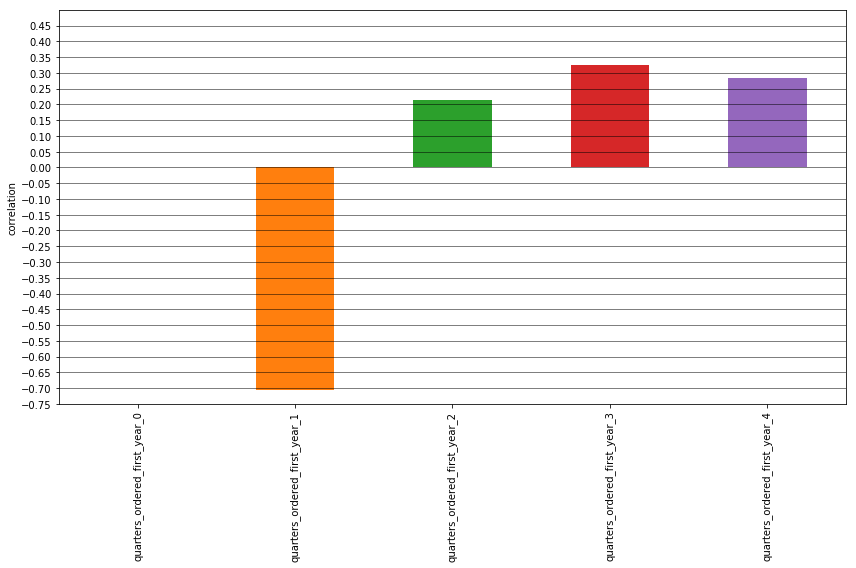

In [76]:
correl[1:].plot.bar(y='retained', legend=False, figsize=(12,8))
plt.ylim(-0.75, 0.5)
plt.yticks(np.arange(-0.75, .5, step=0.05))
plt.ylabel('correlation')
plt.grid(axis='y',linestyle='-', linewidth='0.5', color='black')
plt.tight_layout()
plt.savefig('retention_correl_V3.png', transparent=True)

Get correlations for each individual use case

In [77]:
# get dummies for first_use_case

ret_dummies.head()

user_id       first_use_case  retained  quarters_ordered_first_year_0  \
0   8888854            traveling         1                              0   
1   9742166  traveling, birthday         1                              0   
2  12160876            traveling         0                              0   
3  12947525         just_because         0                              0   
4  32170859         just_because         1                              0   

   quarters_ordered_first_year_1  quarters_ordered_first_year_2  \
0                              0                              1   
1                              1                              0   
2                              1                              0   
3                              1                              0   
4                              0                              1   

   quarters_ordered_first_year_3  quarters_ordered_first_year_4  
0                              0                              0  
1                              0                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0

In [78]:
correlated_cols = ret_dummies.columns[1:]

In [79]:
use_cases = ret_dummies['first_use_case'].unique()

In [82]:
use_cases = ['traveling', 'birthday', 'just_because', 'thank_you',
       'parenting', 'holidays', 'bulk']

In [83]:
correl = ret_dummies[correlated_cols].corr()

# make dataframe of correlation coefficients
retention_corrs = pd.DataFrame(data=correl[1:]['retained']).rename(columns={'retained':'all users'})

# add other use cases to dataframe
for uc in use_cases:
    retention_corrs[uc] = ret_dummies[ret_dummies['first_use_case']==uc][correlated_cols].corr()[1:]['retained']

retention_corrs

all users  traveling  birthday  just_because  \
quarters_ordered_first_year_0   0.002237        NaN  0.012227           NaN   
quarters_ordered_first_year_1  -0.705378  -0.670616 -0.674453     -0.725821   
quarters_ordered_first_year_2   0.212728   0.272144  0.187031      0.223759   
quarters_ordered_first_year_3   0.324312   0.292028  0.331232      0.329568   
quarters_ordered_first_year_4   0.283553   0.225270  0.267390      0.294274   

                               thank_you  parenting  holidays      bulk  
quarters_ordered_first_year_0        NaN        NaN       NaN       NaN  
quarters_ordered_first_year_1  -0.714746  -0.670627 -0.614665 -0.731622  
quarters_ordered_first_year_2   0.210776   0.047262  0.106031  0.340064  
quarters_ordered_first_year_3   0.337628   0.309539  0.331556  0.402114  
quarters_ordered_first_year_4   0.276927   0.355857  0.292813  0.350817

In [84]:
retention_corrs.to_csv('retention_corrs_by_use_case_V2.csv')

## Find features with high correlation with the habit moment to identify the aha moment

In [ ]:
# only select features that are shorter time frame (first 6 months)

In [85]:
df_dummies = pd.get_dummies(df_all, columns=['quarters_ordered_first_year'])

In [86]:
df_dummies.corr()['quarters_ordered_first_year_3'].sort_values(ascending=False)

quarters_ordered_first_year_3       1.000000
retained                            0.324312
months_ordered_first_year           0.255623
months_ordered_last_6               0.240201
mos_ordered_Q3                      0.233223
mos_ordered_Q2                      0.224639
months_ordered_first_6              0.200506
mos_ordered_Q4                      0.172640
days_ordered_Q3                     0.117924
days_ordered_Q2                     0.112704
days_ordered_last_6_months          0.108917
days_ordered_in_month_7             0.098819
mos_ordered_Q1                      0.095676
days_ordered_in_month_8             0.093945
days_ordered_in_month_4             0.089292
days_ordered_in_month_6             0.084902
days_ordered_in_month_5             0.084552
days_ordered_in_month_9             0.079067
days_ordered_Q4                     0.075274
days_ordered_first_6_months         0.074846
orders_year_1                       0.064827
days_ordered_in_month_10            0.058681
days_order

In [ ]:
# none of these are highly correlated with the habit moment - try looking at other actions
# segment by use case
# find action first, then check different time frames

Potential features:
number of use cases, number of addresses added in app, number of unique people sent to (recipients), times opened app, view oreder complete screen...

https://touchnote.eu.looker.com/looks/1855?toggle=dat,fil,pik,vis

In [ ]:
# get actions monthly in first 6 months, find correlations with habit moment (ordered 3 quarters in first year)
# then see if I can narrow in on a particular time range (first 12 weeks, e.g.)

In [94]:
df_users_retained = df_dummies[['user_id', 'quarters_ordered_first_year_3']]
# join this to new dataset with features, on user_id

In [100]:
df_users_retained.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96979 entries, 0 to 96978
Data columns (total 2 columns):
user_id                          96979 non-null int64
quarters_ordered_first_year_3    96979 non-null uint8
dtypes: int64(1), uint8(1)
memory usage: 1.6 MB


In [115]:
df_aha_feats = pd.read_csv('retention other user features for aha moment 2018-11-16T1510.csv')

In [116]:
df_aha_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284096 entries, 0 to 284095
Data columns (total 13 columns):
Users ID                                             284096 non-null int64
Orders Days Since User Tiered Monthly                284096 non-null object
Orders Unique number of days user ordered            284096 non-null int64
Addresses View Recipients                            284096 non-null int64
Order Item Count Recipients                          284096 non-null int64
Order Item Big products sent                         284096 non-null int64
Order Item GC sent                                   284096 non-null int64
Order Item PC sent                                   284096 non-null int64
Orders Count Orders with Count Items >1              284096 non-null int64
Orders Count Orders with only 1 card                 284096 non-null int64
Payments Total Cash                                  284096 non-null float64
Order Item Sales in GBP                              280333 n

In [117]:
df_aha_feats.columns = ['user_id', 'month', 'days_ordered', 'add_recipients', 'order_recipients', 'big_prods', 'GC', 'PC', 'orderitems>1', 'orderitems=1', 'payments', 'sales', 'promo']

In [118]:
df_aha_feats.head()

user_id     month  days_ordered  add_recipients  order_recipients  \
0   9742166  Below 30             2               0                 5   
1  12160876  Below 30             1               0                 5   
2  25760440  Below 30             2               1                 2   
3  25760440  60 to 89             3               0                 4   
4  29080440  Below 30             2               2                 3   

   big_prods  GC  PC  orderitems>1  orderitems=1  payments      sales  promo  
0          0   1   4             0             5     36.36  14.589980      0  
1          0   0   5             0             5     17.95   7.479150      0  
2          0   0   2             0             2     17.93   4.158320      0  
3          0   0   4             0             4     17.93   6.633320      0  
4          0   0   3             0             3     17.91   5.062175      0

In [119]:
df_aha_feats.user_id.nunique()

121201

In [135]:
# group by user id to get all activities in first 6 months
aha_feats_grp = df_aha_feats.groupby('user_id').sum()

In [136]:
aha_feats_grp.tail()

days_ordered  add_recipients  order_recipients  big_prods  GC  PC  \
user_id                                                                        
180017107             2               0                 2          0   0   2   
180017125             2               0                22          0   0  22   
180017127             2               0                73          0   0  73   
180017191             6               0                25          0   0  25   
180017213            11               0                17          0   4  13   

           orderitems>1  orderitems=1  payments      sales  promo  
user_id                                                            
180017107             0             2     32.92   4.983320      0  
180017125             2             0     48.83  37.970432      0  
180017127             5             2    435.80  95.490739      0  
180017191             0            25     91.70  41.841577      0  
180017213             0            17    210.25  32.099670      0

In [137]:
aha_feats = pd.merge(df_users_retained, df_aha_feats, on='user_id')

In [138]:
aha_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219439 entries, 0 to 219438
Data columns (total 14 columns):
user_id                          219439 non-null int64
quarters_ordered_first_year_3    219439 non-null uint8
month                            219439 non-null object
days_ordered                     219439 non-null int64
add_recipients                   219439 non-null int64
order_recipients                 219439 non-null int64
big_prods                        219439 non-null int64
GC                               219439 non-null int64
PC                               219439 non-null int64
orderitems>1                     219439 non-null int64
orderitems=1                     219439 non-null int64
payments                         219439 non-null float64
sales                            216501 non-null float64
promo                            219439 non-null int64
dtypes: float64(2), int64(10), object(1), uint8(1)
memory usage: 23.6+ MB


In [139]:
aha_feats.rename(columns={'quarters_ordered_first_year_3': 'habit_moment'}, inplace=True)

In [140]:
aha_feats.head()

user_id  habit_moment     month  days_ordered  add_recipients  \
0   8888854             0  Below 30             2               4   
1   9742166             0  Below 30             2               0   
2  12160876             0  Below 30             1               0   
3  32170859             0  Below 30             2               0   
4  35713947             0  Below 30             3               0   

   order_recipients  big_prods  GC  PC  orderitems>1  orderitems=1  payments  \
0                 7          0   0   7             1             4     17.95   
1                 5          0   1   4             0             5     36.36   
2                 5          0   0   5             0             5     17.95   
3                 4          1   3   0             0             3     36.69   
4                 3          0   0   3             0             3     20.93   

       sales  promo  
0  10.470810      0  
1  14.589980      0  
2   7.479150      0  
3  28.083320      0  
4   6.974221      0

In [141]:
aha_feats.habit_moment.mean()

0.26875350325147307

In [142]:
aha_feats.corr()['habit_moment'].sort_values(ascending=False)

habit_moment        1.000000
GC                  0.003512
promo              -0.000099
user_id            -0.002540
big_prods          -0.017428
orderitems>1       -0.024933
payments           -0.027036
add_recipients     -0.028101
sales              -0.042919
order_recipients   -0.045293
orderitems=1       -0.046002
PC                 -0.046483
days_ordered       -0.058930
Name: habit_moment, dtype: float64